# Day014 : EDA探索式數據分析_相關係數簡介
Correlation Coefficient(相關係數) : 相關係數是其中一個常⽤用來來了解各個欄欄位與我們想要預測的目標之間的關係的指標。相關係數衡量兩個隨機變量之間線性關係的強度和⽅方向。雖然不是表⽰示變數之間關係的最好方法，但可以提供我們很直觀的了解。
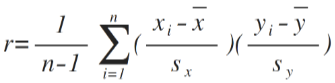

Correlation Coefficient
相關係數是⼀一個介於 -1～1 之間的值，負值代表負相關，正值代表正相關，數值的⼤大⼩小代表相關性的強度
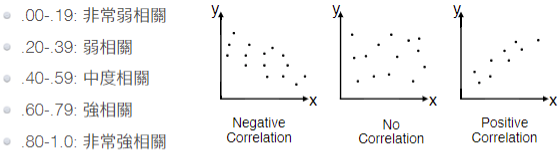

基本的統計數值只能了了解⼀一個變數，如果我們想要了了解兩兩個變數之間的線性關係時，相關係數是⼀一個還不錯的簡單⽅方法，能給出⼀一個 -1~1 之間的值來來量量化兩兩個變數之間的關係。
[Guess the Correlation 相對係數小遊戲](http://guessthecorrelation.com/)

用途:
    1. 可以用相關係數來來迅速找到和預測目標最有線性關係的變數。
    2. 相關係數通常搭配散佈圖來來⼀一起了了解預測⽬目標與變數的關係

## [教學目標]
- 以下程式碼將示範在 python 如何利用 numpy 計算出兩組數據之間的相關係數，並觀察散佈圖
- 藉由觀察相關矩陣與散佈圖的關係, 希望同學對 弱相關 / 正相關 的變數分布情形有比較直覺的理解

In [2]:
# 載入基礎套件
import numpy as np
np.random.seed(1)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 弱相關
# 隨機生成兩組 1000 個介於 0~50 的數的整數 x, y, 看看相關矩陣如何
x = np.random.randint(0, 50, 1000)
y = np.random.randint(0, 50, 1000)

# 呼叫 numpy 裡的相關矩陣函數 (corrcoef)
np.corrcoef(x, y)

array([[1.        , 0.00404702],
       [0.00404702, 1.        ]])

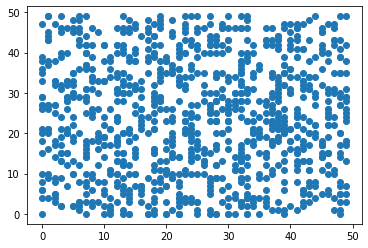

In [4]:
# 將分布畫出來看看吧
plt.scatter(x, y)

In [5]:
# 正相關
# 隨機生成 1000 個介於 0~50 的數 x
x = np.random.randint(0, 50, 1000)

# 這次讓 y 與 x 正相關，再增加一些雜訊
y = x + np.random.normal(0, 10, 1000)

# 再次用 numpy 裡的函數來計算相關係數
np.corrcoef(x, y)

array([[1.       , 0.8218465],
       [0.8218465, 1.       ]])

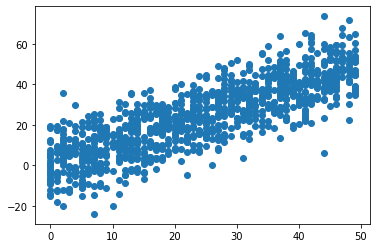

In [6]:
# 再看看正相關的 x,y 分布
plt.scatter(x, y)

## [作業]
參考範例程式碼，模擬一組負相關的資料，並計算出相關係數以及畫出 scatter plot

In [8]:
x = np.random.randint(0, 50, 1000)

# 這次讓 y 與 x 正相關，再增加一些雜訊
y = 100-x

# 再次用 numpy 裡的函數來計算相關係數
np.corrcoef(x, y)

array([[ 1., -1.],
       [-1.,  1.]])

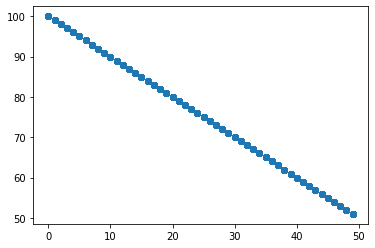

In [9]:
# 再看看負相關的 x,y 分布
plt.scatter(x, y)

In [10]:
x = np.random.randint(0, 50, 1000)

# 這次讓 y 與 x 正相關，再增加一些雜訊
y = 100-x + np.random.normal(0, 5, 1000)

# 再次用 numpy 裡的函數來計算相關係數
np.corrcoef(x, y)

array([[ 1.        , -0.94906534],
       [-0.94906534,  1.        ]])

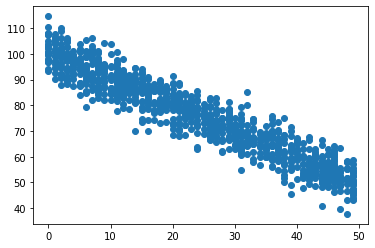

In [11]:
# 再看看負相關的 x,y 分布
plt.scatter(x, y)

# Day015 : EDA探索式數據分析
相關係數 用途:
    1. 迅速找到和預測目標最有線性關係的變數。
    2. 相關係數通常搭配散佈圖來來⼀一起了了解預測⽬目標與變數的關係

Tips: 遇到 y 的本質不是連續數值時
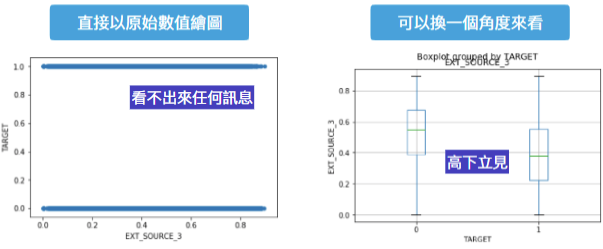

Tips: 檢視不同數值範圍的變數
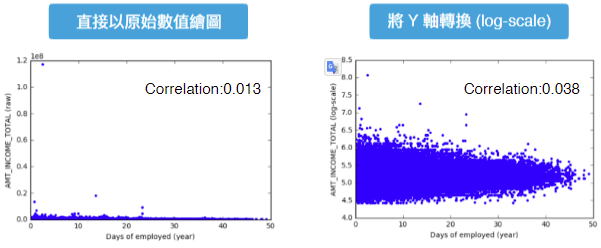

## [教學目標]

    以下程式碼將示範如何繪製特定特徵與目標值之間的散佈圖, 更直覺地看出特徵與目標的關係
    繪製前需要觀察資料, 將異常值排除, 並且轉換成適合的數值單位輔助觀察
    好的圖可以讓你更快認識資料, 繪圖畫的好也是一種藝術

In [12]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

# 讀取 csv 資料檔, 並觀察前幾筆資料 ( .head() )
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# 觀察聘雇天數 'DAYS_EMPLOYED' 內的數值
app_train['DAYS_EMPLOYED']

0           -637
1          -1188
2           -225
3          -3039
4          -3038
5          -1588
6          -3130
7           -449
8         365243
9          -2019
10          -679
11        365243
12         -2717
13         -3028
14          -203
15         -1157
16         -1317
17          -191
18         -7804
19         -2038
20         -4286
21         -1652
22         -4306
23        365243
24          -746
25         -3494
26         -2628
27         -1234
28         -1796
29         -1010
           ...  
307481     -3147
307482      -226
307483    365243
307484      -328
307485      -670
307486     -1185
307487    365243
307488     -1218
307489      -286
307490     -1928
307491     -1953
307492     -1618
307493     -2306
307494     -6573
307495     -7438
307496     -2178
307497     -1222
307498     -3689
307499     -8694
307500     -5326
307501     -1046
307502     -8736
307503      -399
307504     -7258
307505    365243
307506      -236
307507    365243
307508     -79

In [21]:
# 由於其他天數都是負值, 且聘僱日數不太可能是 365243 (大約 1000年), 算是異常數字 
# 因此我們推斷這份資料中, DAYS_EMPLOYED 的欄位如果是 365243, 應該是對應到空缺值, 繪圖時應該予以忽略
sub_df = app_train[app_train['DAYS_EMPLOYED'] != 365243]

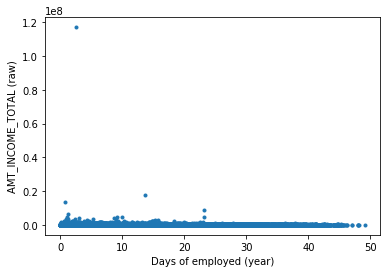

Correlation: 0.0130


In [22]:
# 如果直接畫散布圖 - 看不出任何趨勢或形態
plt.plot(sub_df['DAYS_EMPLOYED'] / (-365), sub_df['AMT_INCOME_TOTAL'], '.')
plt.xlabel('Days of employed (year)')
plt.ylabel('AMT_INCOME_TOTAL (raw)')
plt.show()
corr = np.corrcoef(sub_df['DAYS_EMPLOYED'] / (-365), sub_df['AMT_INCOME_TOTAL'])
print("Correlation: %.4f" % (corr[0][1]))

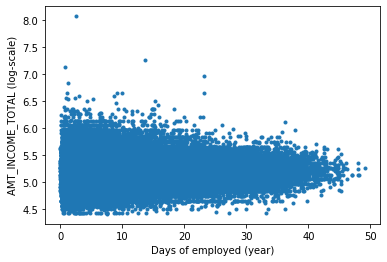

corr [[1.         0.03803312]
 [0.03803312 1.        ]]
Correlation: 0.0380


In [33]:
# 通常可以對數值範圍較大的取 log: 發現雖然沒有相關，但是受雇越久的人，AMT_INCOME_TOTAL 的 variance 越小
plt.plot(sub_df['DAYS_EMPLOYED'] / (-365), np.log10(sub_df['AMT_INCOME_TOTAL'] ), '.')
plt.xlabel('Days of employed (year)')
plt.ylabel('AMT_INCOME_TOTAL (log-scale)')
plt.show()
corr = np.corrcoef(sub_df['DAYS_EMPLOYED'] / (-365), np.log10(sub_df['AMT_INCOME_TOTAL']))
print('corr', corr)
print("Correlation: %.4f" % (corr[1][0]))

## [作業重點]
綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [37]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#檢查每一個column
for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) <= 2:
            #就做Label Encoder，已加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [49]:
# 觀察相關係數
#['TARGET']和其他colimns的相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


In [50]:
correlations = app_train.corr()['TARGET'].sort_values()

# 顯示相關係數最大 / 最小的各15個欄位名稱
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226


In [51]:
#排序

correlations = app_train.corr()['TARGET'].sort_values()

# 顯示相關係數最大 / 最小的各15個欄位名稱
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226


### 觀察
可以看到 DAYS_BIRTH 有最高的正相關，不過還記得這個欄位的值其實是負值，表示說客戶的年紀越大，他們越不會發生遲繳貸款的狀況
這樣有一點混淆，我們就取一下這個欄位的絕對值吧，那麼這個欄位與 TARGET 就會變為負相關

In [52]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

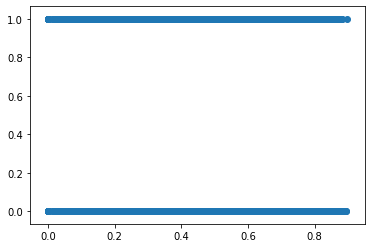

In [53]:
plt.scatter(app_train['EXT_SOURCE_3'], app_train['TARGET']) # 直接畫散佈圖，看不出來任何訊息

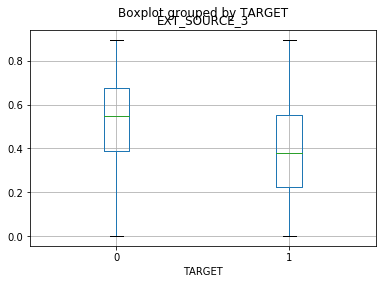

In [54]:
app_train.boxplot(by='TARGET', column='EXT_SOURCE_3')

# Day016 : EDA探索式數據分析_繪圖與樣式＆Kernel Density Estimation (KDE)
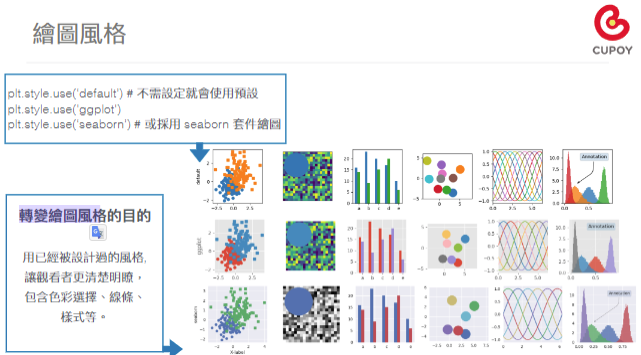

Kernel Density Estimation (KDE)
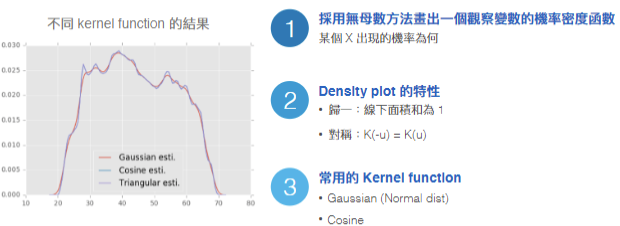

KDE的優缺點:
 - 優 : 無母數方法，對分布沒有假設(使用上不需擔心是否有一些常見的特定假設，如常態分布)。
 - 缺 : 計算量大，電腦不好可能跑不動。

透過 KDE plot，我們可以較為清楚的看到不同組間的分布差異

[繪圖靈感資源參參考Python Graph Gallery (圖表參參考)](https://python-graph-gallery.com/) : 這裡整合了了 Python 許多繪圖函數的寫法，同學可以依據⾃自⼰己的喜好與資料形式，挑選適合的圖形寫作，並不需要全部看懂，只需要當成查詢⽤用的⼯工具⼿手冊即可。


## [教學目標]
以下程式碼將示範如何繪製各種分布圖, 更直覺地看出單一變數本身的分布情形
分布圖包含 KDE(Kenel Density Estimation) 曲線, 以及 Bar(區間長條圖), 提供兩種不同感受
順便熟悉 matplotlib 的幾種繪圖設定

    各種樣式的長條圖
    不同的 KDE 曲線與繪圖設定
    以及切換不同 Kernel function 的效果

In [55]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

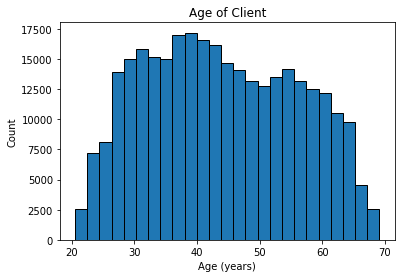

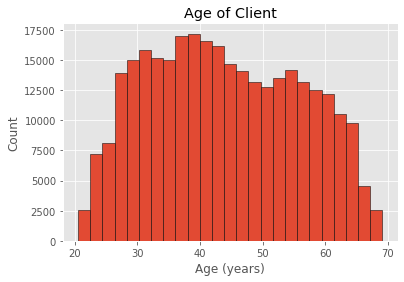

In [57]:
# 以生存年數繪製分布圖
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()

# 改變繪圖樣式 (style)
plt.style.use('ggplot') 

# 改變樣式後再繪圖一次, 比較效果
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');
plt.show()

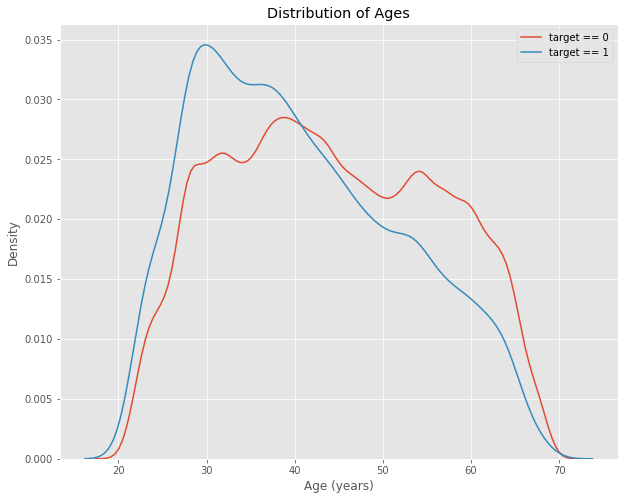

In [61]:
# 設定繪圖區域的長與寬
plt.figure(figsize = (10, 8))

# Kenel Density Estimation (KDE) plot: 會準時還貸者 - 下圖紅線
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')
# KDE plot: 不會準時還貸者 - 下圖藍線
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# 設定標題與 X, y 軸的說明
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

# 輸出繪圖 : 有的ipynb環境, 會在一格結束時自動輸出繪圖, 但加上這行能保證在不同環境都會畫出圖形
plt.show()

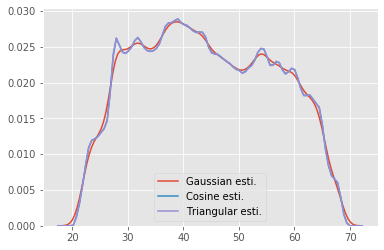

In [62]:
# KDE, 比較不同的 kernel function
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Gaussian esti.', kernel='gau')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Cosine esti.', kernel='cos')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'Triangular esti.', kernel='tri')
plt.show()

補充說明:
 1. [KDE](https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py)
 2. [甚麼是KDE](https://blog.csdn.net/unixtch/article/details/78556499)

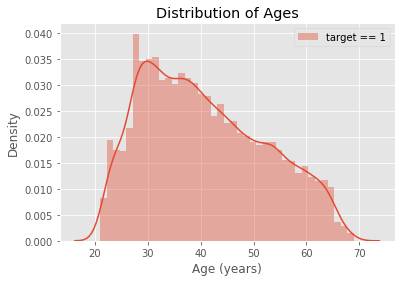

In [63]:
# 完整分布圖 (distplot) : 將 bar 與 Kde 同時呈現
sns.distplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')
plt.legend()
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.show()

## [作業]
    除了直接觀察變項以外，我們也可以分群比較
    自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
    以年齡區間為 x, target 為 y 繪製 barplot

變項的分群比較
1. 自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
2. 以年齡區間為 x, target 為 y 繪製 barplot

[作業目標]

試著調整資料, 並利用提供的程式繪製分布圖

[作業重點]

    如何將資料依照歲數, 將 20 到 70 歲切成11個區間? (In[4], Hint : 使用 numpy.linspace),
    送入繪圖前的除了排序外, 還要注意什麼? (In[5])
    如何調整對應資料, 以繪製長條圖(bar chart)? (In[7])

In [65]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [82]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset

#新增一個欄位 YEARS_BIRTH
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH']/365

#自 20 到 70 歲，切 11 個點 (得到 10 組)
bin_cut = np.linspace(20, 70, num = 11)

#再新增一個欄位 YEARS_BINNED，並切成10組
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut)



In [83]:
age_data

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [84]:
# 顯示不同組的數量
print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

(35.0, 40.0]    42868
(40.0, 45.0]    41406
(30.0, 35.0]    39440
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(25.0, 30.0]    32862
(60.0, 65.0]    27476
(20.0, 25.0]    12159
(65.0, 70.0]     8103
Name: YEARS_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


In [86]:
# 繪圖前先排序 / 分組
"""
Your Code Here
"""
year_group_sorted = np.sort(age_data['YEARS_BINNED'].unique())
year_group_sorted

array([Interval(20.0, 25.0, closed='right'),
       Interval(25.0, 30.0, closed='right'),
       Interval(30.0, 35.0, closed='right'),
       Interval(35.0, 40.0, closed='right'),
       Interval(40.0, 45.0, closed='right'),
       Interval(45.0, 50.0, closed='right'),
       Interval(50.0, 55.0, closed='right'),
       Interval(55.0, 60.0, closed='right'),
       Interval(60.0, 65.0, closed='right'),
       Interval(65.0, 70.0, closed='right')], dtype=object)

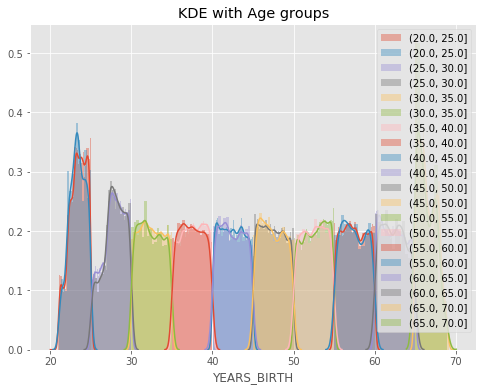

In [94]:
# 設定圖的大小
plt.figure(figsize=(8,6))

# \符號代表換行，因為python官方建議一行不要太多程式碼、言個得縮排限制，因此使用\作為換行，而不影響縮排得設計。
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.legend() #把label顯示出來
plt.show()

In [95]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


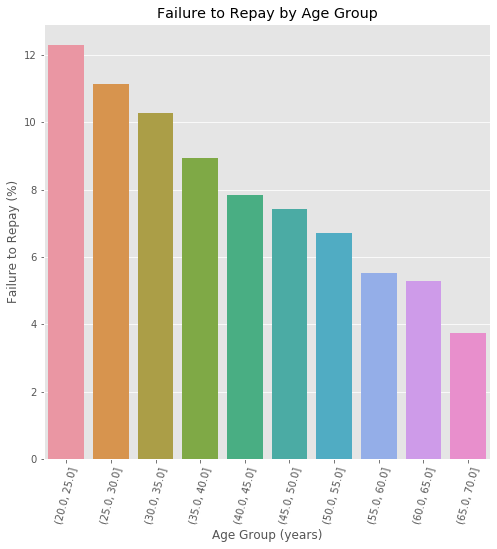

In [101]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = age_groups.index.astype(str)
py = 100 * age_groups['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

## [Q&A]
1. 請問numpy.sort、list.sort()、sort_values()有何不同?
    
    A:一個是 numpy 的方法，一個是list的方法，一個是 pandas 的方法，三個都是不一樣的物件，但做一樣的事情。學python因為不用宣告變數類型，所以初學容易搞混資料型別。"碰上Error，先確定資料是甚麼型態，這個型態可以呼叫嗎，並去google"

2.KDE(核密度函數)和直方圖的差異?別比較好用?

    直方圖優點是畫起來很快(電腦不需要消耗太多效能)，但是為人詬病的地方在於需要切bins，而bins到底要訂多少?以及假如有極端的 outliers，則整個圖會走樣的非常嚴重；反之，KDE 是將分布估算出來並以密度呈現，優點是畫起來不用擔心到底要定 bin 是多少，缺點當然是它得計算，畫起來相對就會久一些。(可以把 KDE 想像成是連續的的 Histogram ，我們也常說 KDE 是一種 histogram 的變形)